In this Notebook I have tried hands-on implementation of PCA and Kernel-PCA using the Wine dataset.

I have also used GridSearchCV alongside with LogisticRegression

## Table of Content

- PCA from stratch using Python
- PCA using sklearn
- PCA  with ML algorithm
- Hyperparameter Tuning for PCA
- Kernel PCA

PCA and LDA are Feature Extraction techniques.

- They will give us sort of new features which are a linear combination of exsisting features.
- The new features will have diffrent values than the original features.

Th main aim is to perform Dimentionality reduction by using *less features* to capture and convey same information.

### PCA

It tends to find the direction of maximum variance in data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

In [5]:
df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
df.shape

(178, 14)

In [7]:
from sklearn.model_selection import train_test_split

X, y = df.iloc[:, 1:], df.iloc[:, 0]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=5,stratify=y)

### PCA from Scratch

#### Steps

1. Standardize the data(X_std)

2. Calculate the **Coviance matrix**

3. Calculate the **Eigen_Vector & Eigen_Values** for the Coviance matrix.

4. Arrange all Eigen_Values in **decreasing order**.

5. **Normalize** the sorted Eigen_Values.

6. Horizontally stack the Normalized_Eigen_Values=**W_matrix**

7. X_PCA=X_std.dot(W_matrix) 

#### Points to remember

1. First Principal Component(PCA-1) will have the highest variance(Eigen_Values)

2. In othe words PCA-1 tells us the direction of highest variation in data.

In [8]:
from sklearn.preprocessing import StandardScaler

# Step 1
scaler=StandardScaler()

X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)

In [55]:
X_train_std.shape,X_train_std.T.shape

((124, 13), (13, 124))

In [11]:
# Step-2
cov_matrix=np.cov(X_train_std.T)

In [12]:
# Step-3

## Eigen_Vector= Represents the direction of variation in data.
## Eigen_Values= Represents the magnitude of Eigen_Vector

eigen_val,eigen_vec=np.linalg.eig(cov_matrix)

In [13]:
print('Eigen values are: \t\n',eigen_val)

Eigen values are: 	
 [4.6284032  2.48895833 1.58920399 0.92825762 0.84132071 0.71204431
 0.561225   0.364817   0.09709712 0.14995276 0.20132715 0.27883206
 0.26425182]


In [14]:
total=sum(eigen_val)
variance_explained=[]
for i in sorted(eigen_val,reverse=True): # Step-4
    variance_explained.append(i/total)# Step-5

cumsum_variance_explained=np.cumsum(variance_explained)

variance_explained

[0.3531597974559742,
 0.18991431394827962,
 0.12126060240156793,
 0.07082858978188185,
 0.06419506630097574,
 0.05433092454413177,
 0.04282299947545361,
 0.027836532911770462,
 0.021275647061677828,
 0.02016313515693939,
 0.015361810851307178,
 0.01144180515902253,
 0.007408774951018019]

In [15]:
cumsum_variance_explained

array([0.3531598 , 0.54307411, 0.66433471, 0.7351633 , 0.79935837,
       0.85368929, 0.89651229, 0.92434883, 0.94562447, 0.96578761,
       0.98114942, 0.99259123, 1.        ])

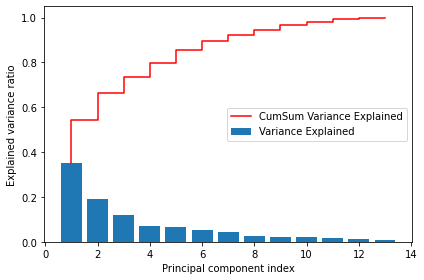

In [17]:
plt.bar(range(1,14),variance_explained,label='Variance Explained')
plt.step(range(1,14),cumsum_variance_explained,label='CumSum Variance Explained',c='r')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()

plt.savefig('PCA_1.png')
plt.show()

#### We can infer from cumsum_variance that from first 6 features  we are abe to capture 80% of the data.

In [18]:
eigen_pairs=[(np.abs(eigen_val[i]),eigen_vec[:,i]) for i in range(len(eigen_val))]

In [20]:
# Step-6

W=np.hstack((eigen_pairs[0][1][:, np.newaxis],eigen_pairs[1][1][:, np.newaxis])) # Pc1=col_1 and PC2=col_2
W

array([[ 0.08375638, -0.52102806],
       [-0.26402402, -0.18889472],
       [ 0.01162711, -0.29825223],
       [-0.22779998,  0.04555477],
       [ 0.15282462, -0.23878135],
       [ 0.39160402, -0.08881866],
       [ 0.42271283, -0.01937182],
       [-0.2984311 , -0.05378771],
       [ 0.30780617, -0.05542185],
       [-0.12642644, -0.53148533],
       [ 0.30852533,  0.25863246],
       [ 0.38574439,  0.1295127 ],
       [ 0.26847148, -0.40550303]])

In [21]:
# Step-7

X_train_pca=X_train_std.dot(W)

In [22]:
X_train_pca.shape

(124, 2)

In [23]:
np.unique(y)

array([1, 2, 3], dtype=int64)

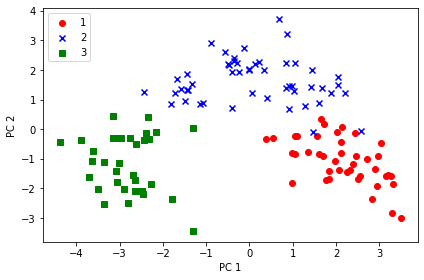

In [24]:
colors=['r','b','g','y']
markers=['o','x','s']

for cls,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_pca[y_train == cls, 0], 
                X_train_pca[y_train == cls, 1], 
                c=c, label=cls, marker=m)
    
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('PCA_2.png')
plt.show()

### Sklearn PCA code

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca=PCA()

X_train_pca=pca.fit_transform(X_train_std)


In [27]:
pca.explained_variance_ratio_

array([0.3531598 , 0.18991431, 0.1212606 , 0.07082859, 0.06419507,
       0.05433092, 0.042823  , 0.02783653, 0.02127565, 0.02016314,
       0.01536181, 0.01144181, 0.00740877])

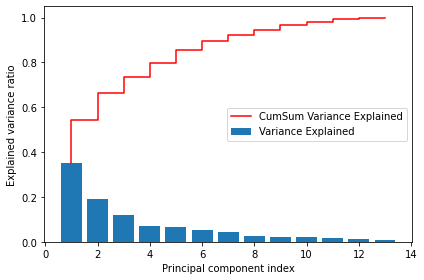

In [28]:
plt.bar(range(1,14),pca.explained_variance_ratio_,label='Variance Explained')
plt.step(range(1,14),np.cumsum(pca.explained_variance_ratio_),label='CumSum Variance Explained',c='r')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [29]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

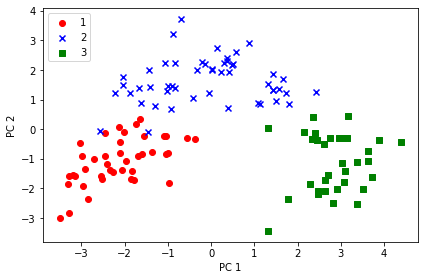

In [30]:
colors=['r','b','g','y']
markers=['o','x','s']

for cls,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_pca[y_train == cls, 0], 
                X_train_pca[y_train == cls, 1], 
                c=c, label=cls, marker=m)
    
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/05_03.png', dpi=300)
plt.show()

### Logistic Regression with PCA

In [31]:
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

In [32]:
def decision_boundary(X,y,clf,res):
    
    x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
    y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
    
    markers=['s','x','o','^']
    colours=['red','lightblue','green','gray']
    colormap=ListedColormap(colours[:len(np.unique(y))])
    
    xx,yy=np.meshgrid(np.arange(x_min,x_max,res),np.arange(y_min,y_max,res))
    
    z=clf.predict(np.c_[np.ravel(xx),np.ravel(yy)])
    zz=z.reshape(xx.shape)
    
    plt.pcolormesh(xx,yy,zz,cmap=colormap,alpha=0.4)
    
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(X[y==cl,0],X[y==cl,1],c=colours[idx],marker=markers[idx],label=cl,cmap=plt.cm.Paired, edgecolors='k',alpha=0.6)
    
    plt.legend()
    plt.tight_layout()

In [34]:
model=LogisticRegression(multi_class='ovr', random_state=1)
model.fit(X_train,y_train)

C:\Users\Dishaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Dishaa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

LogisticRegression(multi_class='ovr', random_state=1)

In [35]:
model.score(X_test,y_test)

0.9814814814814815

In [36]:
pca=PCA(n_components=2)
X_train_pca=pca.fit_transform(X_train_std)
X_test_pca=pca.transform(X_test_std)

In [37]:
model=LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
model.fit(X_train_pca,y_train)

LogisticRegression(multi_class='ovr', random_state=1)

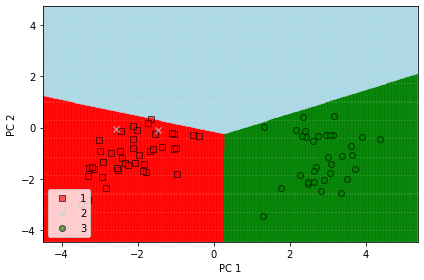

In [38]:
decision_boundary(X_train_pca,y_train,model,res=0.02)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')

plt.savefig('PCA_3.png')
plt.tight_layout()

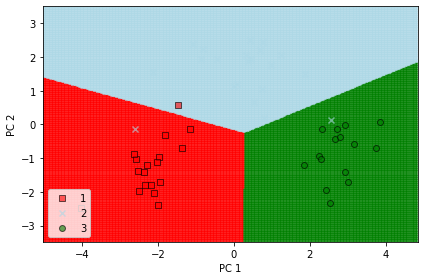

In [39]:
decision_boundary(X_test_pca,y_test,model,res=0.02)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()

plt.savefig('PCA_4.png')
plt.show()

In [40]:
model.score(X_test_pca,y_test)

0.9444444444444444

### Pipelining with PCA+ Logistic Regression + GridSearchCV

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipe=Pipeline([('scaler',StandardScaler()),('pca',PCA()),('model',LogisticRegression(solver='lbfgs',multi_class='ovr'))])

In [43]:
# plt.plot(range(1,14),pipe[1].explained_variance_ratio_,'+', linewidth=10,label='Variance Explained')

# plt.ylabel('Explained variance ratio')
# plt.xlabel('Principal component index')
# plt.legend(loc='best')
# plt.tight_layout()
# plt.show()

In [45]:
para={'pca__n_components':[1,2,4,6,8,10,12],'model__C':[0.01,0.1,1.0,10.0,100.0]}

grid=GridSearchCV(pipe,param_grid=para,scoring='accuracy',cv=5)

grid.fit(X,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('model',
                                        LogisticRegression(multi_class='ovr'))]),
             param_grid={'model__C': [0.01, 0.1, 1.0, 10.0, 100.0],
                         'pca__n_components': [1, 2, 4, 6, 8, 10, 12]},
             scoring='accuracy')

In [46]:
grid.best_params_,grid.best_score_

({'model__C': 1.0, 'pca__n_components': 12}, 0.9888888888888889)

In [47]:
pipe[1].fit(X,y)

PCA()

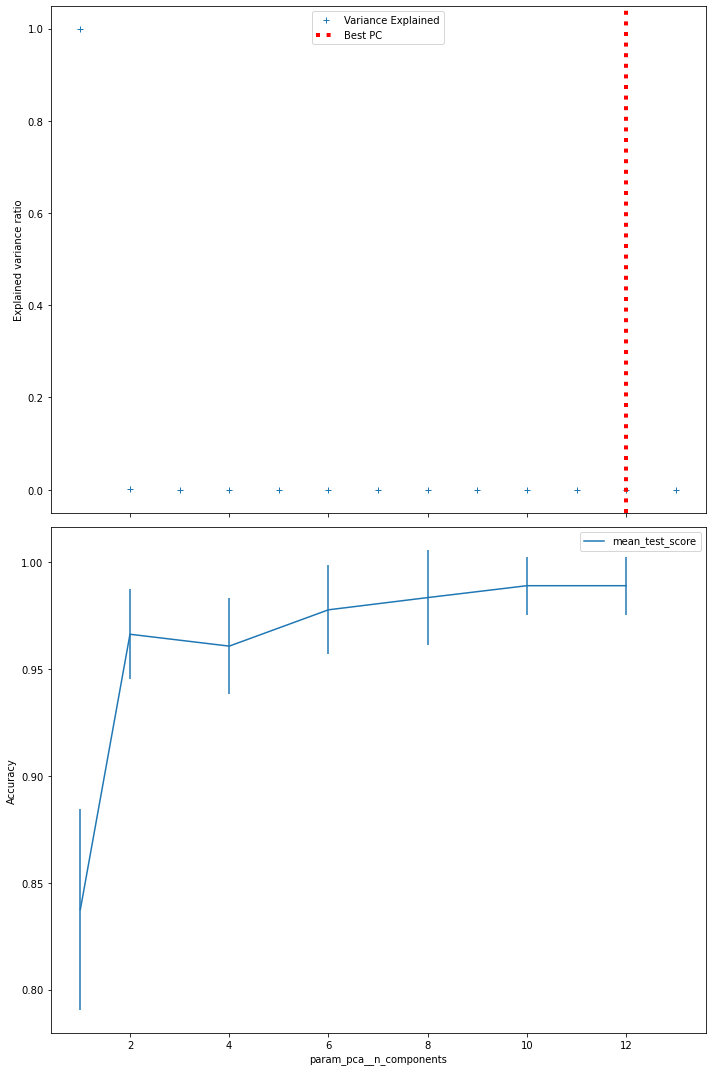

In [48]:
fig,ax=plt.subplots(2,1,figsize=(10,15),sharex=True)

ax[0].plot(range(1,14),pipe[1].explained_variance_ratio_,'+', linewidth=10,label='Variance Explained')
ax[0].axvline(grid.best_estimator_.named_steps['pca'].n_components,linestyle=':',linewidth=4,color='r',label='Best PC')
ax[0].set_ylabel('Explained variance ratio')
ax[0].set_xlabel('Principle Components')

ax[0].legend()

# Plot the accuracy wrt to pc_components
result=pd.DataFrame(grid.cv_results_)
best_clf=result.groupby('param_pca__n_components').apply(lambda g: g.nlargest(1, 'mean_test_score'))
best_clf.plot('param_pca__n_components','mean_test_score',ax=ax[1],yerr='std_test_score')
ax[1].set_ylabel('Accuracy')




plt.tight_layout()
plt.savefig('PCA_5.png')
plt.show()

#### Points to Remember

- We have seen that we have not used our *class-labels* during PCA steps that is why it is called *Un-Supervised*.

- PCA does not know whether it is regression or classification problem. It only cares about *dimentionality-reduction*.

This is the reason why we should be careful while using PCA with *supervised algorithms*.Because *class seperability* is not guaranteed.

### Kernel PCA

#### We know that by using PCA our data gets messed up. But if we use Kernal-PCA then we can retain *class seperability*.
Kernel-PCA works similar to SVM by using *kernel-trick* to deal with non-linear data while maintaining the *class seperability*

In [49]:
from sklearn.decomposition import KernelPCA,PCA
from sklearn.datasets import make_circles

In [50]:
X,y=make_circles(n_samples=400, factor=.3, noise=.05)

In [51]:
X.shape,y.shape

((400, 2), (400,))

In [52]:
pca=PCA()
X_pca=pca.fit_transform(X)

In [53]:
kpca=KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10.0)
X_kpca=kpca.fit_transform(X)
X_back=kpca.inverse_transform(X_kpca)

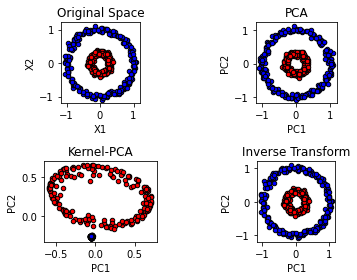

In [54]:
plt.subplot(2,2,1,aspect='equal')
plt.title('Original Space')

plt.scatter(X[y==0,0],X[y==0,1],c='b',s=20,edgecolor='k')
plt.scatter(X[y==1,0],X[y==1,1],c='r',s=20,edgecolor='k')
plt.xlabel('X1')
plt.ylabel('X2')


plt.subplot(2,2,2,aspect='equal')
plt.title('PCA')

plt.scatter(X_pca[y==0,0],X_pca[y==0,1],c='b',s=20,edgecolor='k')
plt.scatter(X_pca[y==1,0],X_pca[y==1,1],c='r',s=20,edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')


plt.subplot(2,2,3,aspect=1)


plt.scatter(X_kpca[y==0,0],X_kpca[y==0,1],c='b',s=20,edgecolor='k')
plt.scatter(X_kpca[y==1,0],X_kpca[y==1,1],c='r',s=20,edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Kernel-PCA')


plt.subplot(2,2,4,aspect=1)


plt.scatter(X_back[y==0,0],X_back[y==0,1],c='b',s=20,edgecolor='k')
plt.scatter(X_back[y==1,0],X_back[y==1,1],c='r',s=20,edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Inverse Transform')


plt.tight_layout()
plt.savefig('kernel_PCA_1.png')
plt.show()